<a href="https://colab.research.google.com/github/sergiolucero/notebooks/blob/main/Remuneraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Remuneraciones
Algunos servicios públicos (¿por qué no todos?) reportan sus remuneraciones online. Por ejemplo, la comuna de Las Condes.

In [5]:
import pandas as pd
import wget
url = 'https://www.lascondes.cl/descargas/transparencia/personal.remuneraciones/rem_personal/2021/febrero/municipal/1.rem.planta.FEB2021.pdf'
#wget.download(url)

In [7]:
!pip install tabula-py

     |████████████████████████████████| 12.0 MB 8.0 MB/s 


In [20]:
import tabula
df = tabula.read_pdf("LC_FEB2021.pdf", pages='all')

In [28]:
print(len(df))
import pandas as pd
ldf = pd.concat(df)
for c in ldf.columns:
  if 'REMU' in c:
    ldf[c] = [float(x.replace('.','')) if isinstance(x,str) else x
              for x in ldf[c]]
ldf.describe().round(0)

28


,REMUNERACION\rBRUTA MENSUAL,REMUNERACION\rLIQUIDA,N° HORAS\rDIURNAS,REMUNERACION\rHORAS DIURNAS,N° HORAS\rNOCTURNAS\rY FESTIVAS,REMUNERACION\rHORAS\rNOCTURNAS Y\rFESTIVAS,VIATICOS
count,691.0,691.0,692.0,692.0,692.0,692.0,1.0
mean,4805028.0,3662929.0,42.0,90647.0,45.0,162821.0,24.0
std,2441244.0,1735214.0,20.0,251504.0,23.0,346998.0,NaN
min,380246.0,380246.0,0.0,0.0,0.0,0.0,24.0
25%,3075649.0,2391931.0,30.0,164.0,30.0,212.0,24.0
50%,3849168.0,2991313.0,48.0,261.0,50.0,353.0,24.0
75%,6308226.0,4904756.0,55.0,401.0,62.0,685.0,24.0
max,11463748.0,8224186.0,83.0,1166895.0,90.0,1853303.0,24.0


In [42]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


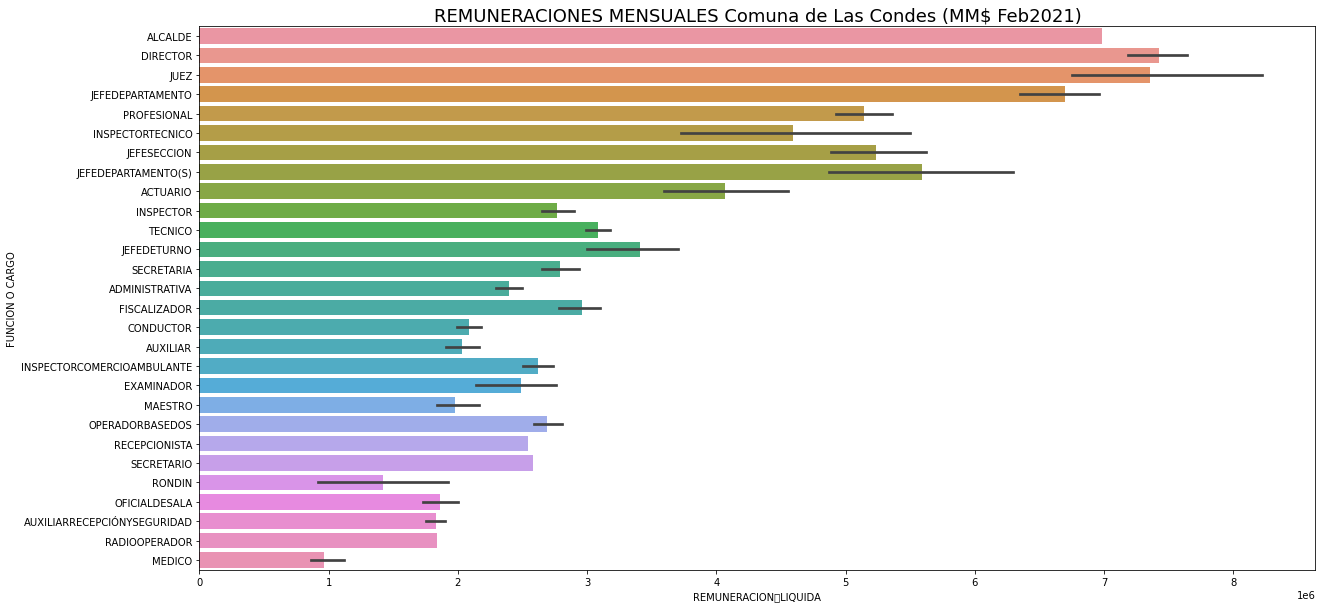

In [41]:
ldf['FUNCION O CARGO'] = ldf['FUNCION O CARGO'].apply(lambda x: ''.join(x.split()))
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1, figsize=(20,10));
sns.barplot(data=ldf, x='REMUNERACION\rLIQUIDA', y='FUNCION O CARGO');
plt.title('REMUNERACIONES MENSUALES Comuna de Las Condes (MM$ Feb2021)', size=18);

In [43]:
# Ahora algun ministerio

In [21]:
ref='http://transparencia.mma.gob.cl/2022/Escala-Remuneraciones-2022.pdf'

Index(['ESTAMENTO', 'NOMBRE FUNCIONARIO', 'GRADO',
       'CALIFICACIÓN\rPROFESIONAL O\rFORMACION', 'FUNCION O CARGO',
       'DIRECCION', 'DEPARTAMENTO', 'REGION', 'ASIGNACIONES\rESPECIALES',
       'UNIDAD\rMONETARIA', 'REMUNERACION\rBRUTA MENSUAL',
       'REMUNERACION\rLIQUIDA', 'HORAS\rEXTRAORDINARIAS\rSI/NO',
       'N° HORAS\rDIURNAS', 'REMUNERACION\rHORAS DIURNAS',
       'N° HORAS\rNOCTURNAS\rY FESTIVAS',
       'REMUNERACION\rHORAS\rNOCTURNAS Y\rFESTIVAS', 'FECHA\rINICIO\rCONTRATO',
       'FECHA\rTERMINO\rCONTRATO', 'OBSERVACIONES',
       'DECLARACION\rDE PATRIMONIO\rE INTERESES', 'VIATICOS'],
      dtype='object')

In [49]:
ldf[ldf['FUNCION O CARGO']=='DIRECTOR'].DIRECCION.apply(lambda x: x.replace('\r',''))

1      TRANSITO YT  RANSPORTEPUBLICO
2                S  EGURIDAD PUBLICA
3     SECRETARIAC  OMUNAL DEPLANIFIC
5                O  BRAS MUNICIPALES
6           ADMINISTRACION YFINANZAS
7             ADMINISTRADORMUNICIPAL
8                          C  ONTROL
9                          J URIDICA
12             DESARROLLOCOMUNITARIO
13              MEDIO AMBIENTE YASEO
14               SECRETARIAMUNICIPAL
22     COMPRAS PUBLICASLOGISTICA Y G
1                  A  SESORIA URBANA
9      INFRAESTR. YSERVICIOS PUBLICO
22                 PARQUES YJARDINES
Name: DIRECCION, dtype: object

In [66]:
madf = pd.read_csv('TransparenciaActiva (2).csv', encoding='latin-1', 
                   thousands='.', delimiter=';')
carne = [c for c in madf.columns if 'Nombre' in c or 'Remu' in c or 'Cargo' in c]
madf.sort_values('Remuneración bruta mensualizada').tail(10)[carne]

,Nombre completo,Cargo o función,Grado EUS / Cargo con jornada,Remuneración bruta mensualizada,Remuneración líquida mensualizada
19,"PEREZ RIVERA, VIVIANA GRACIELA",JEFA DE DIVISIÓN DE ADMINISTRACIÓN Y FINANZAS,3,1701627,-
14,"MAGER SANTOS, JENNY LIESBETH MARIA",JEFA DE DIVISIÓN CAMBIO CLIMATICO,4,1812435,-
16,"NARANJO SOLANO, JAVIER IGNACIO",MINISTRO,B,2042286,-
6,"FERNANDEZ GOMEZ, MARCELO RODRIGO",SUBSECRETARIO,C,2256179,-
22,"RUNGRUANGSAKORN LEIVA, CARLOS",JEFE DIVISIÓN DE EDUCACIÓN AMBIENTAL Y PARTICI...,4,2700192,-
25,"TORO RODRIGUEZ, ROCIO VIOLETA",JEFA DE DIVISIÓN DE CALIDAD DEL AIRE Y CAMBIO ...,3,2818076,-
0,"ANDRADE MOLINA, RAUL OSVALDO",PROFESIONAL DIVISIÓN DE ADMINISTRACIÓN Y FINANZAS,5,3555989,-
21,"RAVANAL FIGARI, JORGE CONRADO",PROFESIONAL DEPARTAMENTO DE LEGISLACIÓN Y REGU...,5,3614387,-
20,"PIÑA RIQUELME, CARLOS DAVID",PROFESIONAL OFICINA DE ASUNTOS INTERNACIONALES,4,3789858,-
15,"MARTINEZ GONZALEZ, ROBERTO LUIS",PROFESIONAL DE DIVISIÓN DE CALIDAD DEL AIRE Y ...,5,4681189,-


In [64]:
madf[madf['Nombre completo'].str.contains('VILLARINO')]

,Año,Mes,Estamento,Nombre completo,Cargo o función,Grado EUS / Cargo con jornada,Calificación profesional o formación,Región,Asignaciones especiales,Unidad monetaria,...,Remuneración líquida mensualizada,Montos y horas extraordinarias diurnas,Montos y horas extraordinarias nocturnas,Montos y horas extraordinarias festivas,Fecha de inicio dd/mm/aa,Fecha de término dd/mm/aa,Declaración de intereses y patrimonio (publicación por buena práctica),Viáticos,Observaciones,Unnamed: 20
499,2022,Marzo,Profesional,"VILLARINO HERRERA, MACARENA",JEFA DE OFICINA DE COMUNICACIONES Y PRENSA,2,PERIODISTA,Región Metropolitana de Santiago,(220)(185)(166)(36)(33),Pesos,...,-,No tiene,No tiene,No tiene,01/01/2022,31/03/2022,No publica,No informa,CONTRATADO SEGUN ART. 13 D.L 1.608 - PORCENTAJ...,NaN
